# Muhammad Putra Harifin Pane


In [5]:
# Panggil Dataset kedalam program
from google.colab import files
uploaded = files.upload()

Saving bbc-text.csv to bbc-text (1).csv


In [3]:
# import pandas
import pandas as pd

In [4]:
# load dataset
df = pd.read_csv('bbc-text.csv')
df.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [5]:
# Melihat informasi dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [6]:
# data columns
df.columns

Index(['category', 'text'], dtype='object')

dataset memiliki 2 kolom yaitu kolom category dan kolom text

In [7]:
# total data
df.shape

(2225, 2)

memiliki total data lebih dari 2000 sampel

In [8]:
# categories
df.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

melakukan one hot econding

In [9]:
category = pd.get_dummies(df.category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [12]:
text = df_baru['text'].values
label = df_baru[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [13]:
#memisahkan data training dan data testing
from sklearn.model_selection import train_test_split
text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.2)

In [14]:
#menggunakan fungsi tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_latih)
tokenizer.fit_on_texts(text_test)

sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [15]:
#menggunakan embendding
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
num_epochs = 10
history = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=2)


Epoch 1/10
56/56 - 283s - loss: 1.6041 - accuracy: 0.2292 - val_loss: 1.5951 - val_accuracy: 0.2247 - 283s/epoch - 5s/step
Epoch 2/10
56/56 - 272s - loss: 1.5204 - accuracy: 0.4247 - val_loss: 1.2451 - val_accuracy: 0.4584 - 272s/epoch - 5s/step
Epoch 3/10
56/56 - 274s - loss: 0.8647 - accuracy: 0.6320 - val_loss: 0.8097 - val_accuracy: 0.6876 - 274s/epoch - 5s/step
Epoch 4/10
56/56 - 272s - loss: 0.3126 - accuracy: 0.8927 - val_loss: 0.6426 - val_accuracy: 0.7843 - 272s/epoch - 5s/step
Epoch 5/10
56/56 - 273s - loss: 0.1230 - accuracy: 0.9646 - val_loss: 0.7428 - val_accuracy: 0.7888 - 273s/epoch - 5s/step
Epoch 6/10
56/56 - 272s - loss: 0.0319 - accuracy: 0.9944 - val_loss: 0.7447 - val_accuracy: 0.8000 - 272s/epoch - 5s/step
Epoch 7/10
56/56 - 275s - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.8042 - val_accuracy: 0.8135 - 275s/epoch - 5s/step
Epoch 8/10
56/56 - 275s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.7567 - val_accuracy: 0.8292 - 275s/epoch - 5s/step
Epoch 9/10
56/56

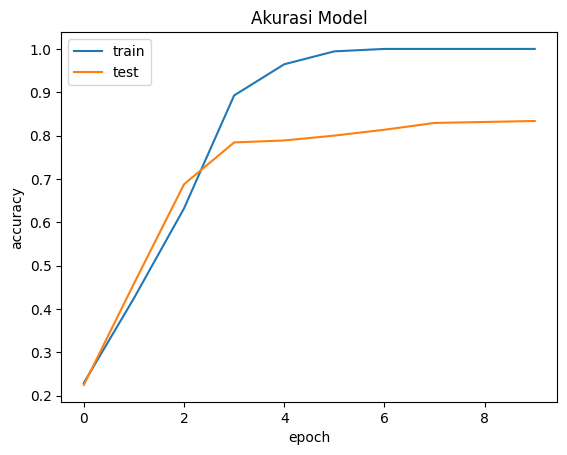

In [17]:
#plot of accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

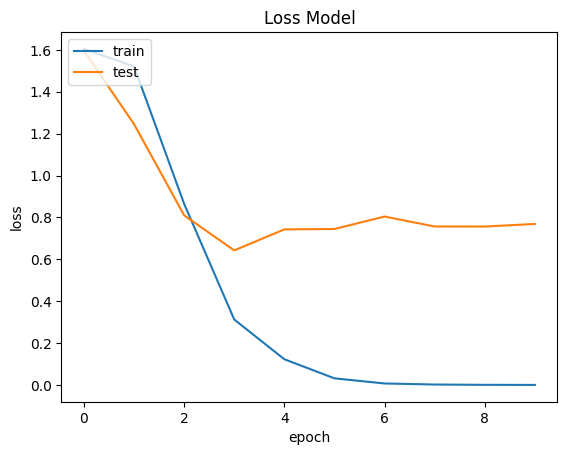

In [18]:
#plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()